In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("FuelConsumption.csv")

In [3]:
df.head()

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230


In [4]:
df.drop("Year", axis=1, inplace=True)

In [5]:
df.head()

,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230


In [6]:
df.columns

Index(['MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS '],
      dtype='object')

In [7]:
col_names = ["mark", "model", "vehicle_class", "engine_size", "cylinders", "transmission", "fuel", "fuel_consumption",
             "coemissions"]

In [8]:
df.columns = col_names

In [9]:
df.head()

,mark,model,vehicle_class,engine_size,cylinders,transmission,fuel,fuel_consumption,coemissions
0,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mark              639 non-null    object 
 1   model             639 non-null    object 
 2   vehicle_class     639 non-null    object 
 3   engine_size       639 non-null    float64
 4   cylinders         639 non-null    int64  
 5   transmission      639 non-null    object 
 6   fuel              639 non-null    object 
 7   fuel_consumption  639 non-null    float64
 8   coemissions       639 non-null    int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 45.1+ KB


In [11]:
df[df.duplicated()]

,mark,model,vehicle_class,engine_size,cylinders,transmission,fuel,fuel_consumption,coemissions
378,LAND ROVER,DISCOVERY SERIES II 4X4,SUV,4.0,8,A4,Z,19.6,403


In [12]:
df.shape

(639, 9)

In [13]:
df = df.drop_duplicates(keep="first", ignore_index=True)

In [14]:
df.shape

(638, 9)

In [15]:
df[df.duplicated()]

,mark,model,vehicle_class,engine_size,cylinders,transmission,fuel,fuel_consumption,coemissions


In [16]:
df.isnull().sum()

mark                0
model               0
vehicle_class       0
engine_size         0
cylinders           0
transmission        0
fuel                0
fuel_consumption    0
coemissions         0
dtype: int64

In [17]:
df.describe()

,engine_size,cylinders,fuel_consumption,coemissions
count,638.000000,638.000000,638.000000,638.000000
mean,3.264577,5.802508,14.705956,296.642633
std,1.231634,1.624535,3.303962,65.420203
min,1.000000,3.000000,4.900000,104.000000
25%,2.200000,4.000000,12.500000,253.000000
50%,3.000000,6.000000,14.400000,288.000000
75%,4.300000,6.000000,16.600000,343.000000
max,8.000000,12.000000,30.200000,582.000000


In [18]:
for col in df.columns:
    print(df[col].unique())
    

['ACURA' 'AUDI' 'BMW' 'BUICK' 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DAEWOO'
 'DODGE' 'FERRARI' 'FORD' 'GMC' 'HONDA' 'HYUNDAI' 'INFINITI' 'ISUZU'
 'JAGUAR' 'JEEP' 'KIA' 'LAND ROVER' 'LEXUS' 'LINCOLN' 'MAZDA'
 'MERCEDES-BENZ' 'NISSAN' 'OLDSMOBILE' 'PLYMOUTH' 'PONTIAC' 'PORSCHE'
 'SAAB' 'SATURN' 'SUBARU' 'SUZUKI' 'TOYOTA' 'VOLKSWAGEN' 'VOLVO']
['1.6EL' '3.2TL' '3.5RL' 'INTEGRA' 'INTEGRA GSR/TYPE R' 'NSX' 'A4'
 'A4 QUATTRO' 'A6' 'A6 AVANT QUATTRO' 'A6 QUATTRO' 'A8 QUATTRO'
 'S4 QUATTRO' 'TT COUPE QUATTRO' 'TT COUPE QUATTRO (SUPERCHARGED)'
 'TT ROADSTER' 'TT ROADSTER QUATTRO (SUPERCHARGED)' '323 CONVERTIBLE'
 '323Ci' '323i' '328Ci' '328i' '528i' '528i TOURING' '540i' '540i TOURING'
 '740i' '740iL' '750iL' 'M COUPE' 'M ROADSTER' 'M5' 'X5' 'Z3' 'Z8'
 'CENTURY' 'LESABRE' 'PARK AVENUE' 'PARK AVENUE #' 'REGAL' 'REGAL #'
 'CATERA' 'DEVILLE' 'ELDORADO' 'ESCALADE 4X4' 'SEVILLE' 'ASTRO AWD CARGO'
 'ASTRO AWD PASSENGER' 'ASTRO CARGO' 'ASTRO PASSENGER' 'BLAZER'
 'BLAZER 4X4' 'C1500 SILVERADO' 'C2500 SILV

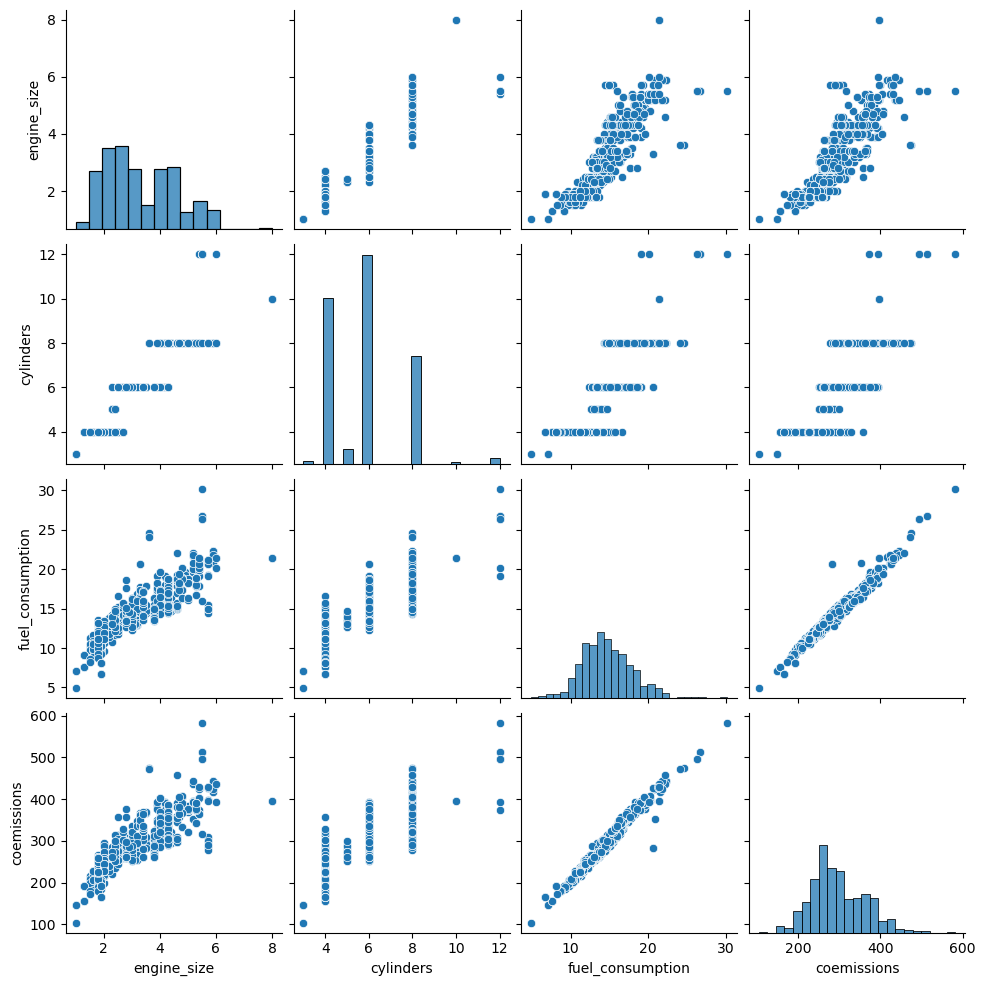

In [19]:
sns.pairplot(data=df)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['coemissions'], kde=True)
plt.show()

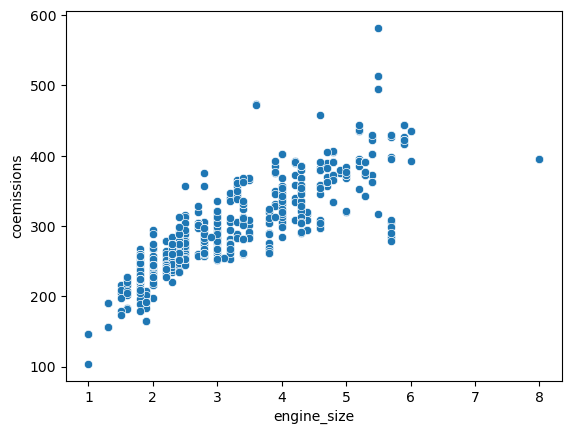

In [20]:
sns.scatterplot(df, x="engine_size", y ="coemissions")
plt.show()

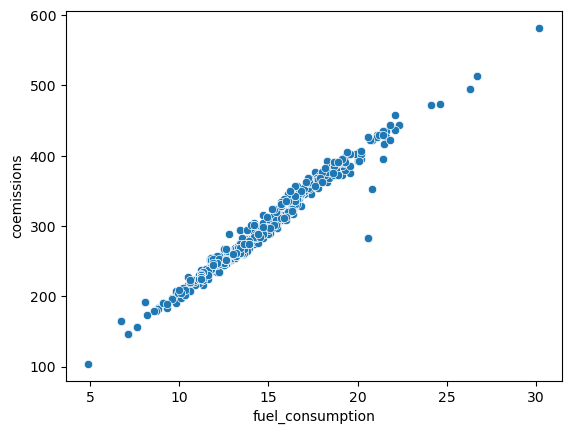

In [21]:
sns.scatterplot(df, x="fuel_consumption", y="coemissions")
plt.show()

In [22]:
len((df[(df["engine_size"]< 7)]))

636

In [23]:
len(df[(df["fuel_consumption"]<26)&(df["fuel_consumption"]>7)])

629

In [24]:
df = df[(df["engine_size"]< 7)]
df = df[(df["fuel_consumption"]<26)&(df["fuel_consumption"]>7)]

In [25]:
df.shape

(627, 9)

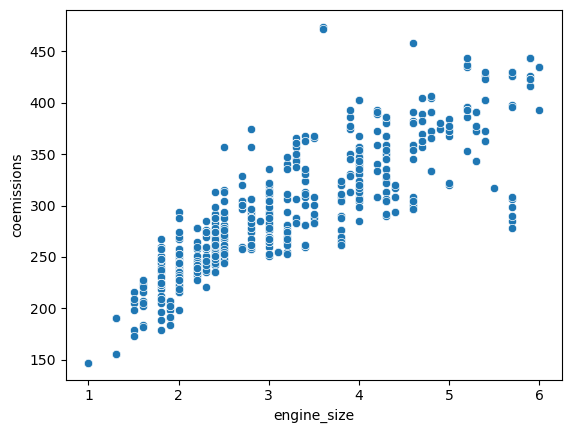

In [26]:
sns.scatterplot(df, x="engine_size", y ="coemissions")
plt.show()

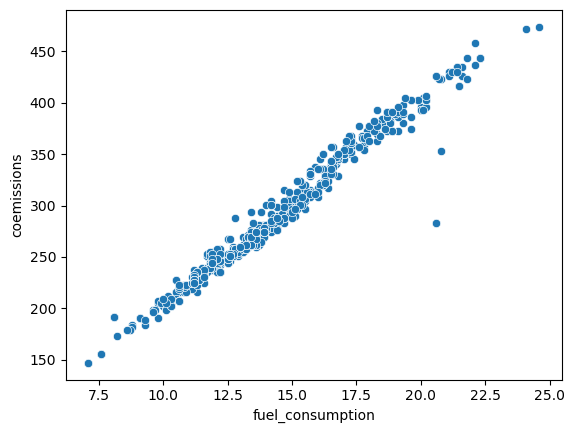

In [27]:
sns.scatterplot(df, x="fuel_consumption", y="coemissions")
plt.show()

In [28]:
df.corr(numeric_only=True)

,engine_size,cylinders,fuel_consumption,coemissions
engine_size,1.000000,0.901525,0.869309,0.857293
cylinders,0.901525,1.000000,0.800394,0.772537
fuel_consumption,0.869309,0.800394,1.000000,0.982070
coemissions,0.857293,0.772537,0.982070,1.000000


In [29]:
df.head()

,mark,model,vehicle_class,engine_size,cylinders,transmission,fuel,fuel_consumption,coemissions
0,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230


In [30]:
df["mark"].value_counts() # freq

mark
CHEVROLET        63
FORD             62
DODGE            44
TOYOTA           43
GMC              38
VOLKSWAGEN       33
BMW              29
AUDI             22
MERCEDES-BENZ    22
PONTIAC          21
VOLVO            21
MAZDA            20
CHRYSLER         19
NISSAN           19
HONDA            16
SATURN           15
SUZUKI           13
SUBARU           12
DAEWOO           10
HYUNDAI          10
JAGUAR           10
SAAB              9
ACURA             9
PORSCHE           8
JEEP              8
ISUZU             8
LEXUS             7
LINCOLN           6
BUICK             6
OLDSMOBILE        5
CADILLAC          5
INFINITI          4
KIA               4
LAND ROVER        3
FERRARI           2
PLYMOUTH          1
Name: count, dtype: int64

In [31]:
df["model"].value_counts() # freq

model
LS                    6
JETTA                 6
RAM 1500              5
SUNFIRE               5
C1500 SILVERADO       5
                     ..
TOWN & COUNTRY        1
C 230 KOMPRESSOR #    1
C 280                 1
C 43 AMG              1
V70R AWD TURBO        1
Name: count, Length: 322, dtype: int64

In [32]:
df["vehicle_class"].value_counts() # freq

vehicle_class
COMPACT                     103
SUV                          96
SUBCOMPACT                   95
PICKUP TRUCK - STANDARD      92
MID-SIZE                     77
FULL-SIZE                    28
MINIVAN                      26
STATION WAGON - MID-SIZE     25
VAN - CARGO                  23
VAN - PASSENGER              17
STATION WAGON - SMALL        13
MINICOMPACT                  11
PICKUP TRUCK - SMALL         11
TWO-SEATER                   10
Name: count, dtype: int64

In [33]:
df["transmission"].value_counts() # ordinal 

transmission
A4     321
M5     187
A5      73
M6      18
AS4     12
A3      10
AS5      5
AS6      1
Name: count, dtype: int64

In [34]:
df["fuel"].value_counts() # ordinal 

fuel
X    453
Z    168
D      3
E      2
N      1
Name: count, dtype: int64

In [35]:
X = df.drop("coemissions", axis=1)
y = df["coemissions"]

In [36]:
X.head()

,mark,model,vehicle_class,engine_size,cylinders,transmission,fuel,fuel_consumption
0,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5
1,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8
2,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7
3,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0
4,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [38]:
categorical = [col for col in df.columns if df[col].dtype == "O"]
numerical = [col for col in df.columns if df[col].dtype != "O"]

In [39]:
categorical

['mark', 'model', 'vehicle_class', 'transmission', 'fuel']

In [40]:
numerical

['engine_size', 'cylinders', 'fuel_consumption', 'coemissions']

In [41]:
# frequency encoding -> mark, model, vehicle_class
# one-hot encoding -> transmission, fuel

In [42]:
onehot_columns = ["transmission", "fuel"]
freq_columns = ["mark", "model", "vehicle_class"]

In [43]:
for col in freq_columns:
    freq = X_train[col].value_counts() / len(X_train)

    X_train[col + "_freq"] = X_train[col].map(freq)

    X_test[col + "_freq"] = X_test[col].map(freq)

    mean_freq = freq.mean()
    X_test[col + "_freq"] = X_test[col + "_freq"].fillna(mean_freq)

In [44]:
X_train.head()

,mark,model,vehicle_class,engine_size,cylinders,transmission,fuel,fuel_consumption,mark_freq,model_freq,vehicle_class_freq
89,CHEVROLET,CAMARO,SUBCOMPACT,5.7,8,M6,Z,14.7,0.101796,0.007984,0.143713
555,TOYOTA,COROLLA,COMPACT,1.8,4,M5,X,8.7,0.065868,0.001996,0.165669
221,FORD,E150 CLUB WAGON,VAN - PASSENGER,4.6,8,A4,X,18.8,0.103792,0.005988,0.033932
456,OLDSMOBILE,ALERO,COMPACT,3.4,6,A4,X,13.6,0.005988,0.001996,0.165669
599,VOLKSWAGEN,JETTA,COMPACT,2.8,6,A4,X,14.2,0.051896,0.007984,0.165669


In [45]:
X_test.head()

,mark,model,vehicle_class,engine_size,cylinders,transmission,fuel,fuel_consumption,mark_freq,model_freq,vehicle_class_freq
277,FORD,WINDSTAR WAGON,MINIVAN,3.8,6,A4,X,15.5,0.103792,0.001996,0.049900
44,BMW,528i TOURING,STATION WAGON - SMALL,2.8,6,M5,Z,14.5,0.041916,0.001996,0.019960
440,NISSAN,FRONTIER V6,PICKUP TRUCK - STANDARD,3.3,6,A4,X,16.8,0.027944,0.001996,0.141717
597,VOLKSWAGEN,JETTA,COMPACT,2.0,4,A4,X,11.9,0.051896,0.007984,0.165669
331,HONDA,PRELUDE,SUBCOMPACT,2.2,4,M5,Z,12.0,0.021956,0.001996,0.143713


In [46]:
X_train = X_train.drop(["mark", "model", "vehicle_class"], axis=1)
X_test = X_test.drop(["mark", "model", "vehicle_class"], axis=1)

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [48]:
transformer = ColumnTransformer(
    transformers= [
        ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"), onehot_columns)
    ], remainder="passthrough"
)

In [49]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [50]:
encoded_cols = transformer.get_feature_names_out()

In [51]:
encoded_cols

array(['onehot__transmission_A4', 'onehot__transmission_A5',
       'onehot__transmission_AS4', 'onehot__transmission_AS5',
       'onehot__transmission_AS6', 'onehot__transmission_M5',
       'onehot__transmission_M6', 'onehot__fuel_E', 'onehot__fuel_N',
       'onehot__fuel_X', 'onehot__fuel_Z', 'remainder__engine_size',
       'remainder__cylinders', 'remainder__fuel_consumption',
       'remainder__mark_freq', 'remainder__model_freq',
       'remainder__vehicle_class_freq'], dtype=object)

In [52]:
X_train = pd.DataFrame(X_train, columns=encoded_cols)
X_test = pd.DataFrame(X_test, columns=encoded_cols)

In [53]:
X_train.head()

,onehot__transmission_A4,onehot__transmission_A5,onehot__transmission_AS4,onehot__transmission_AS5,onehot__transmission_AS6,onehot__transmission_M5,onehot__transmission_M6,onehot__fuel_E,onehot__fuel_N,onehot__fuel_X,onehot__fuel_Z,remainder__engine_size,remainder__cylinders,remainder__fuel_consumption,remainder__mark_freq,remainder__model_freq,remainder__vehicle_class_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5.7,8.0,14.7,0.101796,0.007984,0.143713
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.8,4.0,8.7,0.065868,0.001996,0.165669
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.6,8.0,18.8,0.103792,0.005988,0.033932
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.4,6.0,13.6,0.005988,0.001996,0.165669
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.8,6.0,14.2,0.051896,0.007984,0.165669


In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [61]:
import warnings
warnings.filterwarnings("ignore")

In [62]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [63]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "Elasticnet" : ElasticNet(), 
    "K Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "Adaboost Regressor" : AdaBoostRegressor(),
    "Gradient Boost Regressor" : GradientBoostingRegressor(),
    "LightGBM Regressor" : LGBMRegressor(),
    "XGBoost Regressor" : XGBRegressor()
}

In [64]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    print("Model performance for Training Set")
    print("Root Mean Squared Error: ", model_train_rmse)
    print("Mean Absolute Error: ", model_train_mae)
    print("R2 Score: ", model_train_r2)

    print("-----------------------------------")
    
    print("Model performance for Test Set")
    print("Root Mean Squared Error: ", model_test_rmse)
    print("Mean Absolute Error: ", model_test_mae)
    print("R2 Score: ", model_test_r2)

    print("-----------------------------------")
    print("\n")

Linear Regression
Model performance for Training Set
Root Mean Squared Error:  7.122912451403436
Mean Absolute Error:  5.6035916164178525
R2 Score:  0.9870920218958701
-----------------------------------
Model performance for Test Set
Root Mean Squared Error:  6.690697246560428
Mean Absolute Error:  5.340853675937547
R2 Score:  0.9854870276314902
-----------------------------------


Lasso
Model performance for Training Set
Root Mean Squared Error:  11.991225675074565
Mean Absolute Error:  7.297047012297324
R2 Score:  0.9634177713245046
-----------------------------------
Model performance for Test Set
Root Mean Squared Error:  7.856668280622015
Mean Absolute Error:  6.372805776028639
R2 Score:  0.9799880022508362
-----------------------------------


Ridge
Model performance for Training Set
Root Mean Squared Error:  8.33245839427429
Mean Absolute Error:  6.16463701704792
R2 Score:  0.9823359894740802
-----------------------------------
Model performance for Test Set
Root Mean Squared 